# Employee Attrition 

# Problem Statement

A Study on Employee attrition prediction through Explorary Data Analysis and Machine Learning

# What is employee attrition?

Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for:

* Personal reasons
* Professional motivation
* Job mismatch
* Issues in the workplace


The attrition rate is calculated as the percent of employees who have left the organization by the average number of employees

##### Attrition Rate = Number of Employees left the workplace/Average Number of Employees x 100

# 𝐼𝑚𝑝𝑜𝑟𝑡𝑖𝑛𝑔 𝐿𝑖𝑏𝑟𝑎𝑟𝑖𝑒𝑠

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 𝐼𝑚𝑝𝑜𝑟𝑡𝑖𝑛𝑔 𝐷𝑎𝑡𝑎𝑠𝑒𝑡

In [2]:
df=pd.read_csv('HR-Employee-Attrition.csv')

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### About Dataset

The "IBM HR Analytics Employee Attrition & Performance" dataset is a collection of employee data from a fictional company, made available on Kaggle. The dataset includes information about employee demographics, job role, performance ratings, job satisfaction, work environment, and other related factors.

The dataset is  used for the purpose of predicting employee attrition, or the likelihood that an employee will leave the company. The dataset contains a target variable "Attrition" which indicates whether an employee has left the company or not.

Some of important variables in the dataset that of interest include:

* Age: The age of the employee
* BusinessTravel: The frequency of business travel for the employee
* Department: The department in which the employee works
* Education: The highest level of education completed by the employee
* EnvironmentSatisfaction: The employee's level of satisfaction with their work environment
* JobInvolvement: The employee's level of involvement in their job
* JobLevel: The level of the employee's job in the company hierarchy
* JobRole: The employee's job role
* MonthlyIncome: The employee's monthly income
* OverTime: Whether the employee works overtime or not
* PerformanceRating: The employee's most recent performance rating
* TotalWorkingYears: The total number of years the employee has worked
* WorkLifeBalance: The employee's level of work-life balance satisfaction
* YearsAtCompany: The number of years the employee has worked at the company

The dataset can be used to develop machine learning models to predict employee attrition and to explore the factors that contribute to attrition in the company.

The data contains 1,470 instances (employees), 237 employees are attrited, 1,233 employees are not attrited.

The "Attrition" feature will be our dependent feature, and the rest of the features are independent.

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


## the columns in our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.shape

(1470, 35)

# DATA CLEANING

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().any().count()

35

In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df.isna().sum().sum()

0

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Certain variables do not have any variability in them. Such variables are:

* Employee Count: This is just a count of employee and the value it takes is always 1.
* Employee Number: This is just a index of employee and the value it takes is taken from 1 to 1469
* Over18: This variable describes if an employee is over 18 years of age. It takes the value ‘Yes’ in all cases.
* StandardHours: The standard number of hours an employee works in a week. Its constant value is 80


#### To drop unnecessary columns

In [13]:

df=df.drop('EmployeeCount',axis=1)
df=df.drop('EmployeeNumber',axis=1)
df=df.drop('Over18',axis=1)
df=df.drop('StandardHours',axis=1)

In [14]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#                  𝐸𝑥𝑝𝑙𝑜𝑟𝑎𝑟𝑡𝑜𝑟𝑦 𝐷𝑎𝑡𝑎 𝐴𝑛𝑎𝑙𝑦𝑡𝑖𝑐𝑠

#                                    𝐼𝑛𝑠𝑖𝑔ℎ𝑡𝑠

#### * CONTINOUS

 * Age
 * DailyRate
 * DistanceFromHome
 * EnvironmentSatisfaction
 * HourlyRate
 * JobInvolvement
 * JobLevel
 * JobSatisfaction
 * MonthlyIncome
 * MonthlyRate
 * NumCompaniesWorked
 * PercentSalaryHike
 * PerformanceRating
 * RelationshipSatisfaction
 * StockOptionLevel
 * TotalWorkingYears
 * TrainingTimesLastYear
 * WorkLifeBalance
 * YearsAtCompany
 * YearsInCurrentRole
 * YearsSinceLastPromotion
 * YearsWithCurrManager

#### * CATEGORICAL

* Attrition
* BusinessTravel
* Department
* EducationField
* Gender
* JobRole
* MaritalStatus
* OverTime

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### 𝑆𝑝𝑙𝑖𝑡𝑖𝑛𝑔 𝑡ℎ𝑒 𝑐𝑜𝑙𝑢𝑚𝑛𝑠 𝑖𝑛𝑡𝑜 𝑡𝑤𝑜 𝑠𝑒𝑝𝑎𝑟𝑎𝑡𝑒 𝑙𝑖𝑠𝑡

In [16]:

continuous = ['Age','DailyRate','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears']

categorical = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

## CONTINOUS VARIABLE
### Box plot

<AxesSubplot:xlabel='DistanceFromHome'>

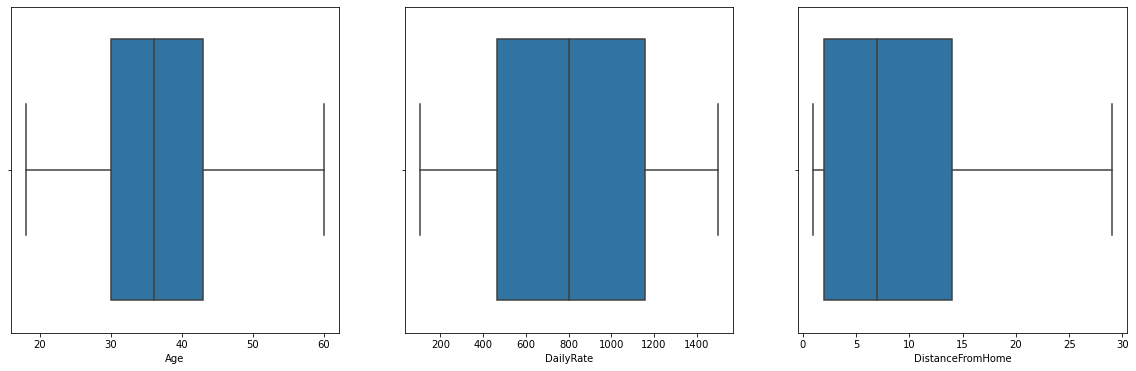

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.Age)
plt.subplot(1,3,2)
sns.boxplot(x=df.DailyRate)
plt.subplot(1,3,3)
sns.boxplot(x=df.DistanceFromHome)



<AxesSubplot:xlabel='JobInvolvement'>

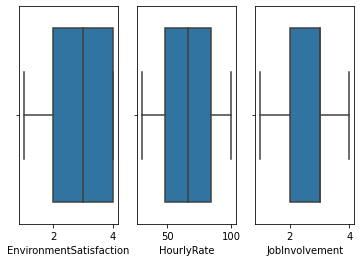

In [18]:
plt.subplot(1,3,1)
sns.boxplot(x=df.EnvironmentSatisfaction)
plt.subplot(1,3,2)
sns.boxplot(x=df.HourlyRate)
plt.subplot(1,3,3)
sns.boxplot(x=df.JobInvolvement)


<AxesSubplot:xlabel='MonthlyRate'>

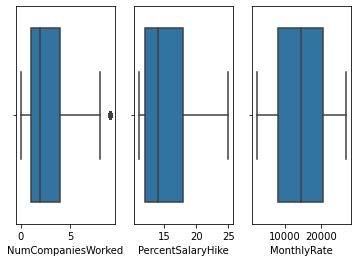

In [19]:
plt.subplot(1,3,1)
sns.boxplot(x=df.NumCompaniesWorked)
plt.subplot(1,3,2)
sns.boxplot(x=df.PercentSalaryHike)
plt.subplot(1,3,3)
sns.boxplot(x=df.MonthlyRate)

<AxesSubplot:xlabel='MonthlyIncome'>

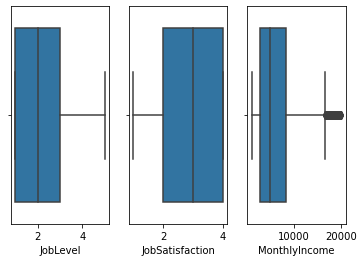

In [20]:
plt.subplot(1,3,1)
sns.boxplot(x=df.JobLevel)
plt.subplot(1,3,2)
sns.boxplot(x=df.JobSatisfaction)
plt.subplot(1,3,3)
sns.boxplot(x=df.MonthlyIncome)


<AxesSubplot:xlabel='PerformanceRating'>

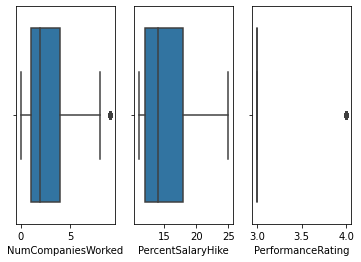

In [21]:
plt.subplot(1,3,1)
sns.boxplot(x=df.NumCompaniesWorked)
plt.subplot(1,3,2)
sns.boxplot(x=df.PercentSalaryHike)
plt.subplot(1,3,3)
sns.boxplot(x=df.PerformanceRating)

<AxesSubplot:xlabel='TotalWorkingYears'>

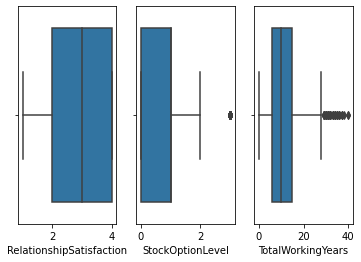

In [22]:
plt.subplot(1,3,1)
sns.boxplot(x=df.RelationshipSatisfaction)
plt.subplot(1,3,2)
sns.boxplot(x=df.StockOptionLevel)
plt.subplot(1,3,3)
sns.boxplot(x=df.TotalWorkingYears)

<AxesSubplot:xlabel='YearsAtCompany'>

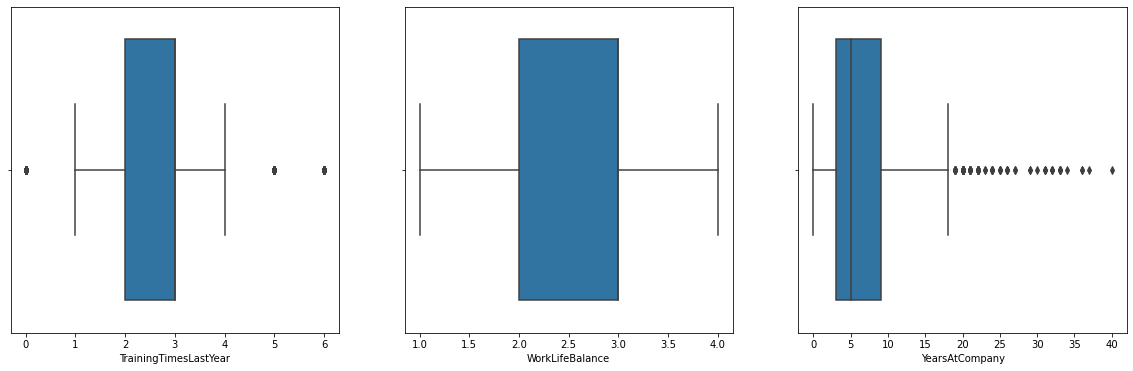

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.TrainingTimesLastYear)
plt.subplot(1,3,2)
sns.boxplot(x=df.WorkLifeBalance)
plt.subplot(1,3,3)
sns.boxplot(x=df.YearsAtCompany)

<AxesSubplot:xlabel='YearsWithCurrManager'>

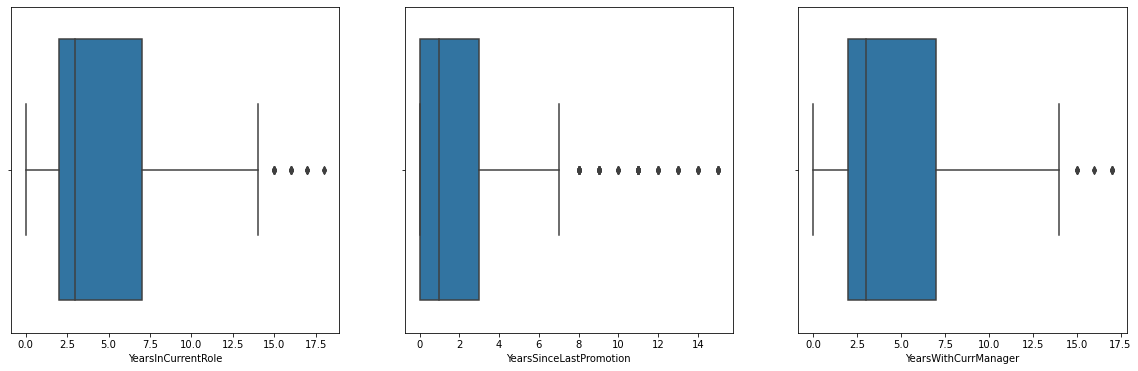

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.YearsInCurrentRole)
plt.subplot(1,3,2)
sns.boxplot(x=df.YearsSinceLastPromotion)
plt.subplot(1,3,3)
sns.boxplot(x=df.YearsWithCurrManager)

# Insight

* Age: The median age of employees is around 35 years, with a range of 18 to 60 years. 

* DailyRate: The median daily rate is around $800, with a range from $100 to $1500. 

* DistanceFromHome: The median distance from home is around 7 miles, with a range from 1 to 29 miles. 

* HourlyRate: The median hourly rate is around $65, with a range from $30 to $100.

* MonthlyIncome: The median monthly income is around $5000, with a range from $1000 to $20,000. 

* MonthlyRate: The median monthly rate is around $15,000, with a range from $2000 to $27000. 

* NumCompaniesWorked: The median number of companies worked for is 2, with a range from 0 to 9. 

* PercentSalaryHike: The median percent salary hike is around 14%, with a range from 11% to 25%. 

* TotalWorkingYears: The median total working years is around 10 years, with a range from 0 to 40 years. 

* TrainingTimesLastYear: The median training times last year is 3, with a range from 0 to 6.

* YearsAtCompany: The median years at company is around 5 years, with a range from 0 to 40 years. 

* YearsInCurrentRole: The median years in current role is around 3 years, with a range from 0 to 18 years. 

* YearsSinceLastPromotion: The median years since last promotion is around 1 year, with a range from 0 to 15 years. 

* YearsWithCurrManager: The median years with current manager is around 3 years, with a range from 0 to 17 years. 

## CATEGORICAL VARIABLES


#### Unique values

In [25]:
# Print all of the data types and their unique value
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('___________________________________________________________________')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
___________________________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
___________________________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
___________________________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
___________________________________________________________________
Gender:

### Count plot

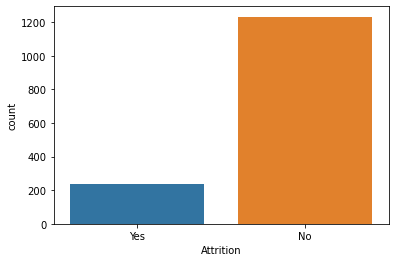

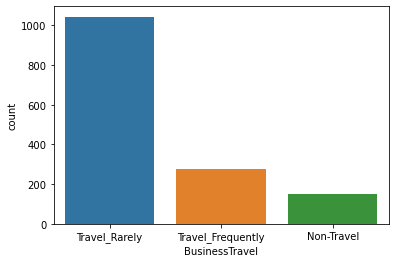

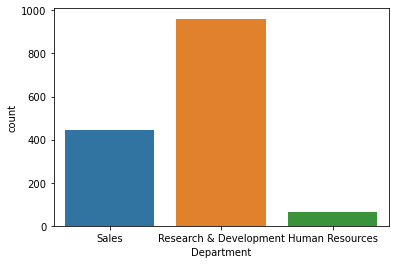

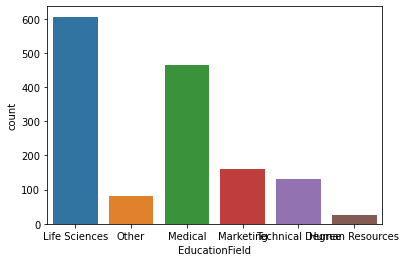

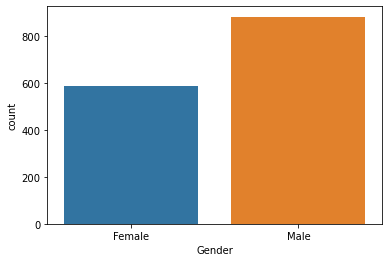

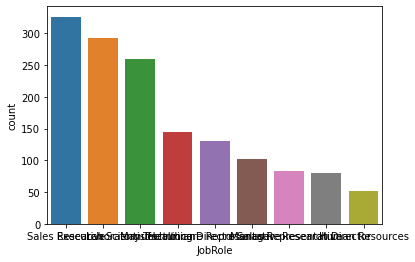

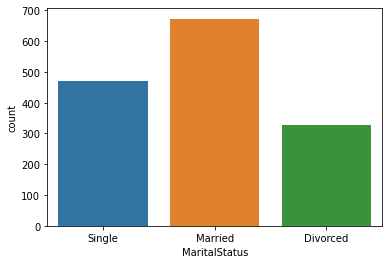

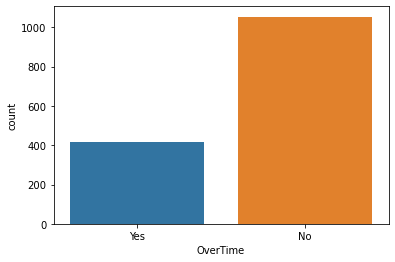

In [26]:
for i in categorical:
    sns.countplot(df[i])
    plt.savefig(f'{i}')
    plt.show()

# 𝐼𝑛𝑠𝑖𝑔ℎ𝑡𝑠

# Pie plot

<AxesSubplot:ylabel='Attrition'>

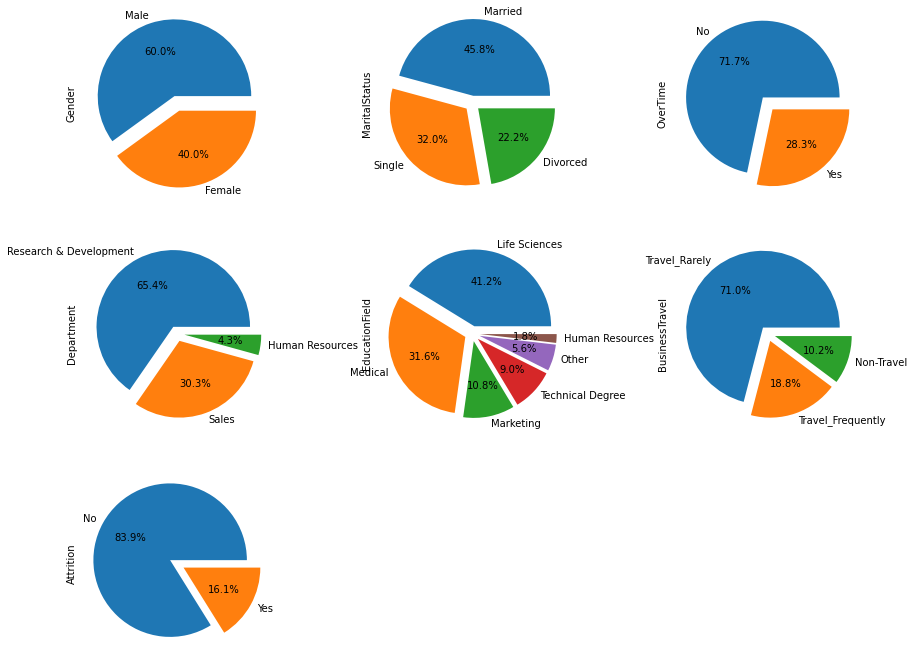

In [27]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
df.Gender.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])
plt.subplot(3,3,2)
df.MaritalStatus.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1,0.1])
plt.subplot(3,3,3)
df.OverTime.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])
plt.subplot(3,3,4)
df.Department.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1,0.1])
plt.subplot(3,3,5)
df.EducationField.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.subplot(3,3,6)
df.BusinessTravel.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1,0.1])
plt.subplot(3,3,7)
df.Attrition.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])

### Attrition 

In [28]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

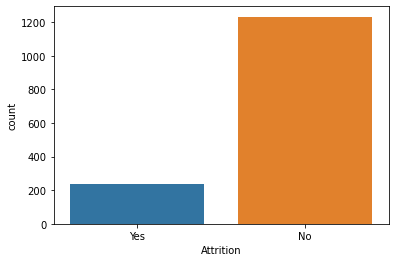

In [29]:
# To visualize the number of employees that stayed and left the company
sns.countplot(df['Attrition'])

### Attrition Rate:

In [30]:
num_attrition = df[df['Attrition'] == 'Yes'].shape[0]
num_employees = df.shape[0]
attrition_rate = num_attrition / num_employees * 100
print("Attrition rate: {:.2f}%".format(attrition_rate))

Attrition rate: 16.12%


## TO FIND FACTORS AFFECTING ATTRITION

### Attrition V/s Age

<AxesSubplot:xlabel='Age', ylabel='count'>

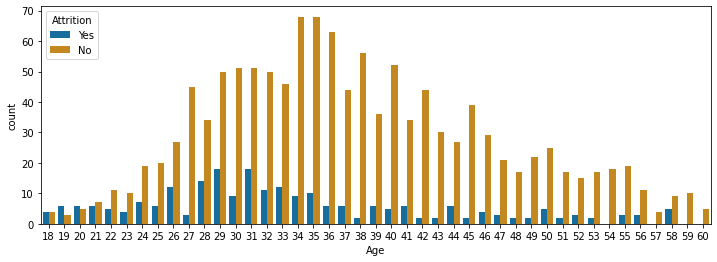

In [31]:

plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

we can observe that the number of employees leaving the company tends to be higher in the younger age groups, with the highest attrition rates being in the age group between 29 and 31 years. The number of employees leaving the company gradually decreases as age increases, with the lowest attrition rates being in the age group between 54 and 60 years. Overall, this countplot suggests that age may be a factor influencing employee attrition in the company, with younger employees being more likely to leave the company than older employees. However, it is important to note that other factors may also be involved and further analysis is needed to identify the underlying causes of employee attrition.

### Attrition V/s Distance from Home

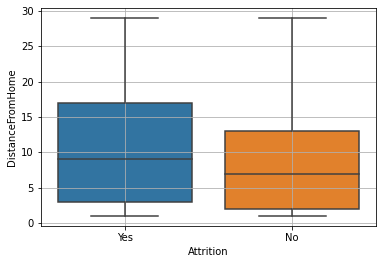

In [32]:
sns.boxplot(df['Attrition'], df['DistanceFromHome'])
plt.grid(True)

From this boxplot, we can observe that the median "DistanceFromHome" is slightly higher for employees who have left the company compared to those who have stayed. Additionally, the interquartile range (IQR) is slightly wider for employees who have left the company, indicating that there is more variability in "DistanceFromHome" for these employees. However, there is also a fair amount of overlap between the two groups, as there are many employees who have stayed with the company despite living a relatively far distance from work.

### Attrition V/s Job Satisfaction

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

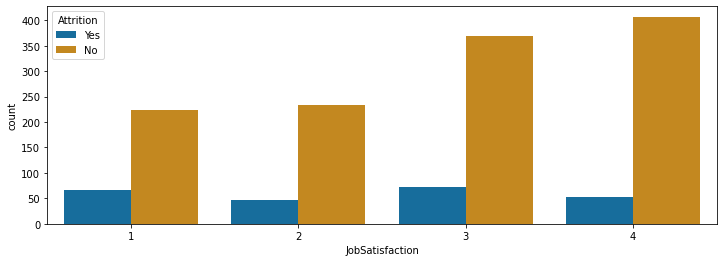

In [33]:
plt.subplots(figsize=(12,4))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df,palette='colorblind')

From this countplot, we can observe that the likelihood of attrition decreases as job satisfaction increases. That is, employees who are more satisfied with their job are less likely to leave the company, while employees who are less satisfied with their job are more likely to leave. Additionally, we can see that the largest number of employees who have left the company are those who have low levels of job satisfaction, with the number decreasing as job satisfaction increases.

### Attrition V/s Performance rating

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

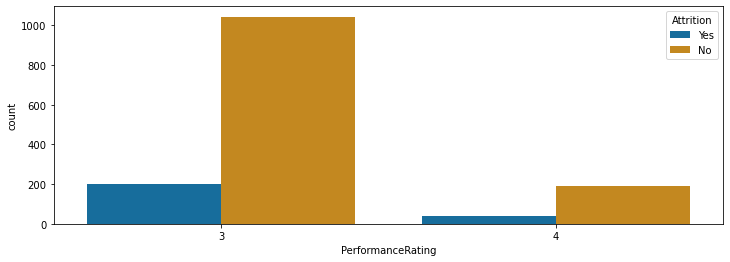

In [34]:
plt.subplots(figsize=(12,4))
sns.countplot(x='PerformanceRating',hue='Attrition',data=df,palette='colorblind')

From this countplot, we can observe that employees who have a higher performance rating are less likely to leave the company compared to employees who have a lower performance rating. In other words, there is a negative relationship between performance rating and attrition, where as performance rating increases, attrition decreases. Additionally, we can see that the largest number of employees who have left the company are those who have a performance rating of 3, while the lowest number of employees who have left the company are those who have a performance rating of 4.

### Attrition V/s Training Times last year

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

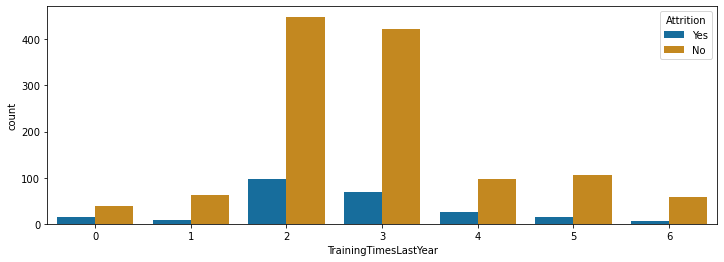

In [35]:
plt.subplots(figsize=(12,4))
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df,palette='colorblind')

From this countplot, we can observe that the likelihood of attrition decreases as the number of training times last year increases. In other words, employees who have received more training are less likely to leave the company compared to those who have received less training. Additionally, we can see that the largest number of employees who have left the company are those who have received only two training times last year, while the lowest number of employees who have left the company are those who have received six training times last year.

### Attrition V/s Work life Balance

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

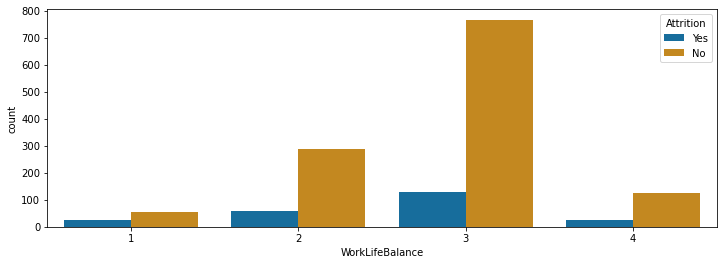

In [36]:
plt.subplots(figsize=(12,4))
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df,palette='colorblind')

From this countplot, we can observe that employees who have a better work-life balance are less likely to leave the company compared to those who have a poor work-life balance. Specifically, employees with a work-life balance rating of 3 are more likely to stay in the company, while those with a work-life balance rating of 2 are more likely to leave the company. Additionally, we can see that the largest number of employees who have left the company are those with a work-life balance rating of 3, while the lowest number of employees who have left the company are those with a work-life balance rating of 4.

### Attrition V/s Years in current Role

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

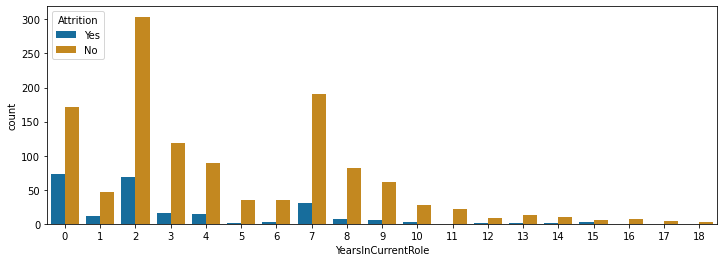

In [37]:
plt.subplots(figsize=(12,4))
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=df,palette='colorblind')

From this countplot, we can observe that employees who have spent less time in their current role are more likely to leave the company compared to those who have spent more time in their current role. Specifically, employees who have spent only 1 to 2  year in their current role are more likely to leave the company, while those who have spent 7 years or more in their current role are less likely to leave the company. 

### Attrition V/s Years since last promotion

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

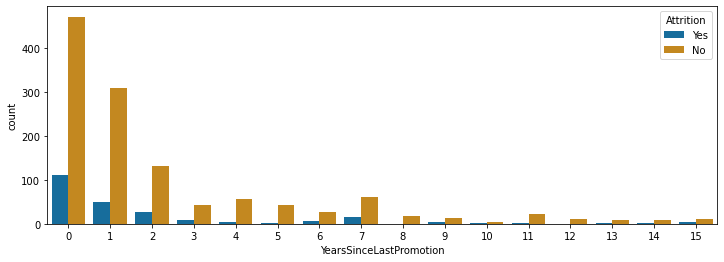

In [38]:
plt.subplots(figsize=(12,4))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,palette='colorblind')

From this countplot, we can observe that employees who have not been promoted in the past 3 years are more likely to leave the company compared to those who have been promoted more recently. Specifically, employees who have not been promoted in the past 3 years are more likely to leave the company, while those who have been promoted within the past year are less likely to leave the company. Additionally, we can see that the largest number of employees who have left the company are those who have not been promoted in the past 1-2 years, while the lowest number of employees who have left the company are those who have been promoted within the past year.

### Attrition V/s Years at company

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

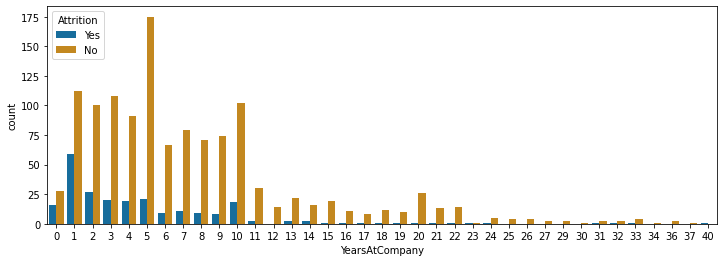

In [39]:
plt.subplots(figsize=(12,4))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df,palette='colorblind')

From this countplot, we can observe that employees who have worked at the company for 1-5 years are more likely to leave the company compared to those who have worked at the company for longer periods. Specifically, employees who have worked at the company for 1-2 years are the most likely to leave the company, while those who have worked at the company for more than 10 years are the least likely to leave the company. Additionally, we can see that the largest number of employees who have left the company are those who have worked at the company for 1-2 years, while the lowest number of employees who have left the company are those who have worked at the company for more than 10 years.

### Attrition V/s Categorical variables

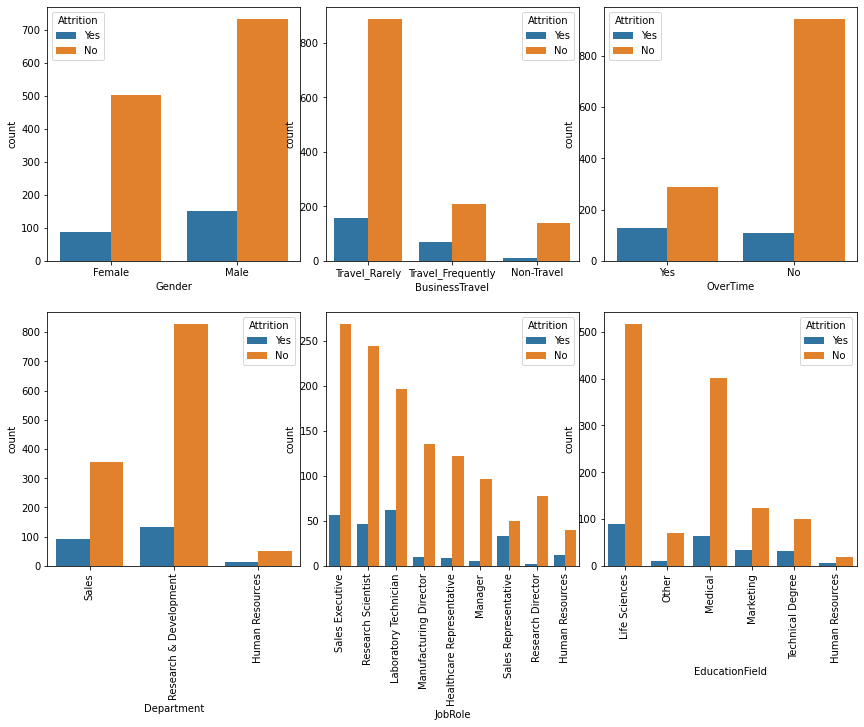

In [40]:
total_records= len(df)
columns=['Gender','BusinessTravel','OverTime','Department','JobRole','EducationField']
j=0
for i in columns:
        j +=1
        plt.subplot(3,3,j)
        ax1=sns.countplot(data=df,x= i,hue="Attrition")
        if(j==4 or j==5 or j==6):
            plt.xticks(rotation=90)
        
plt.subplots_adjust(bottom=1,top=4,right=2.0,wspace=0.1)
plt.show()

# Insights

Business Travel vs. Attrition:

* Non-Travel: 92% of employees have not left the company, 8% have left
* Travel_Rarely: 85% of employees have not left the company, 15% have left
* Travel_Frequently: 73% of employees have not left the company, 27% have left

Department vs. Attrition:

* Sales:73% of employees have not left the company, 27% have left
* Research & Development: 86% of employees have not left the company, 14% have left
* Human Resources: 76% of employees have not left the company, 24% have left

Education Field vs. Attrition:

* Life Sciences: 85% of employees have not left the company, 15% have left
* Medical: 86% of employees have not left the company, 14% have left
* Marketing: 76% of employees have not left the company, 24% have left
* Technical Degree: 75% of employees have not left the company, 25% have left
* Other: 88% of employees have not left the company, 12% have left
* Human Resources: 78% of employees have not left the company, 22% have left

Gender vs. Attrition:

* Male: 83% of employees have not left the company, 17% have left
* Female: 85% of employees have not left the company, 15% have left

Job Role vs. Attrition:

* Sales Executive: 82% of employees have not left the company, 18% have left
* Research Scientist: 87% of employees have not left the company, 13% have left
* Laboratory Technician: 76% of employees have not left the company, 24% have left
* Manufacturing Director: 92% of employees have not left the company, 8% have left
* Healthcare Representative: 88% of employees have not left the company, 12% have left
* Manager: 95% of employees have not left the company, 5% have left
* Sales Representative: 62% of employees have not left the company, 38% have left
* Research Director: 92% of employees have not left the company, 8% have left
* Human Resources: 81% of employees have not left the company, 19% have lef

# 𝐻𝑒𝑎𝑡 𝑀𝑎𝑝



### Defining Correlation between each features:

In [41]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


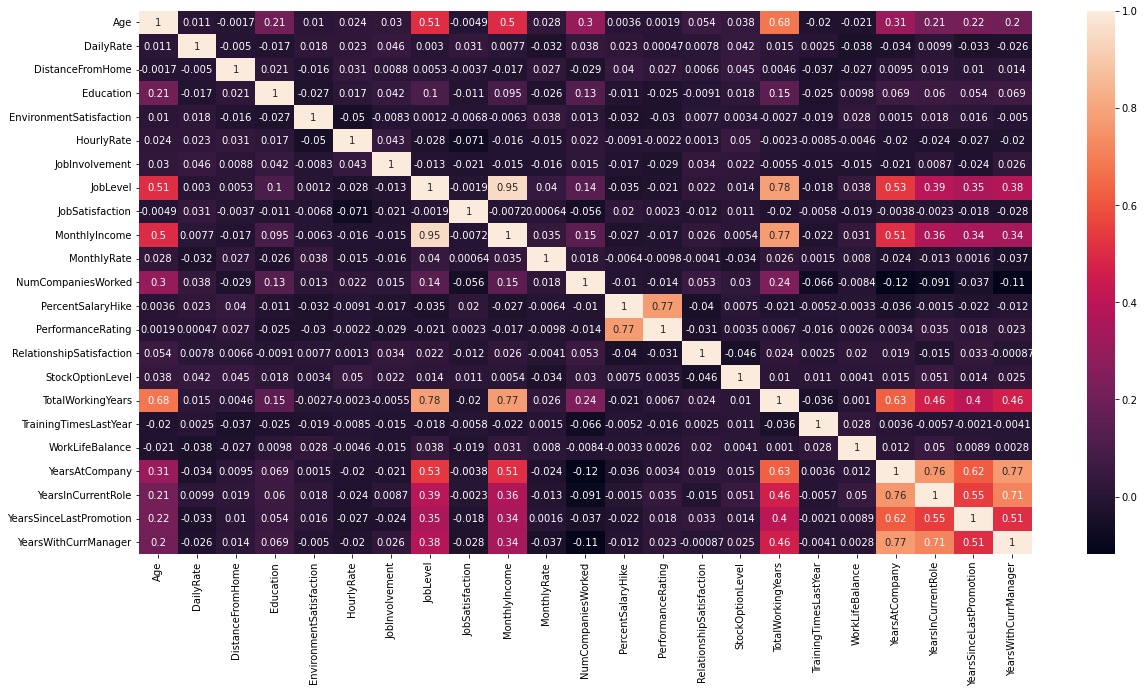

In [42]:
# visualization of correlation
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

The above graph shows the correlation between independent variables. We perform this to necessarily check for multi collinearity. A rule of thumb that is followed for multi collinearity is if correlation coefficient (r) is close to 0.80. Based on that we identify the following variables to have a high correlation:

Correlation between MonthlyIncome and JobLevel is 0.95. This is a very high correlation.

Correlation between TotalWorkingYears and JobLevel is 0.78 which is also very close to 0.80.

Correlation between TotalWorkingYears and MonthlyIncome is 0.77 which is also very close to 0.80.

Correlation between YearsAtcompany and YearsAtcompanyManager is 0.77 which is also very close to 0.80.

All other variables seem to have a correlation which is less than 0.80

# Factors Affecting Attrition

Categorical Variables:

* Gender: The attrition rate is higher for male employees than female employees in this dataset.
* Marital Status: The attrition rate is higher for employees who are single than those who are married or divorced.
* Business Travel: The attrition rate is higher for employees who travel frequently.
* Department: The attrition rate is higher for employees working in Sales and Human Resources departments.
* Job Role: The attrition rate is higher for employees working in Sales Executive and Laboratory Technician job roles.
* OverTime: The attrition rate is higher for employees who work overtime.

Continuous Variables:

* Age: The attrition rate is higher for employees who are younger.
* Distance From Home: The attrition rate is higher for employees who have to travel longer distances to get to work.
* Job Level: The attrition rate is higher for employees who are at lower job levels.
* Monthly Income: The attrition rate is higher for employees who earn lower salaries.
* Total Working Years: The attrition rate is higher for employees who have less total working experience.
* Years at Company: The attrition rate is higher for employees who have spent fewer years in the company.
* Years in Current Role: The attrition rate is higher for employees who have spent fewer years in their current role.
* Years since last promotion: The attrition rate is higher for employees who have not been promoted recently.
* Training Times Last Year: The attrition rate is higher for employees who have received fewer training sessions in the last year.
* Work Life Balance: The attrition rate is higher for employees who report lower work-life balance.


## SUGGESTION

* Increase job satisfaction
* Address overtime issues
* Improve communication: Good communication is essential for employee engagement and retention
* Address performance issues : Provide clear performance expectations, regular feedback, and   opportunities for skill development and training.


# Machine learning and Data Modeling

In [43]:
# to transform the data
#Transform non_numerical in to numerical column
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

In [44]:
# to create new coulmn
df['Age_years']=df['Age']


In [45]:
df=df.drop('Age',axis=1)

In [46]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


### 𝑆𝑒𝑝𝑎𝑟𝑎𝑡𝑖𝑛𝑔 𝑇𝑎𝑟𝑔𝑒𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 𝑓𝑟𝑜𝑚 𝑜𝑡ℎ𝑒𝑟 𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠:

In [47]:
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

### splitting data

In [48]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 30), (441, 30), (1029,), (441,))

#### Training Data and Test Data


The training data is randomly chosen 1,029 (70%) instances, 172 represents attrited employees, 857 did not attrited.

The test data is the remaining 441 (30%) instances, 65 represents attrited employees, 376 employees that did not attrited.

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 880 to 221
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   BusinessTravel            441 non-null    int32
 1   DailyRate                 441 non-null    int64
 2   Department                441 non-null    int32
 3   DistanceFromHome          441 non-null    int64
 4   Education                 441 non-null    int64
 5   EducationField            441 non-null    int32
 6   EnvironmentSatisfaction   441 non-null    int64
 7   Gender                    441 non-null    int32
 8   HourlyRate                441 non-null    int64
 9   JobInvolvement            441 non-null    int64
 10  JobLevel                  441 non-null    int64
 11  JobRole                   441 non-null    int32
 12  JobSatisfaction           441 non-null    int64
 13  MaritalStatus             441 non-null    int32
 14  MonthlyIncome             441 non-null  

## 𝐹𝑒𝑎𝑡𝑢𝑟𝑒 𝑆𝑐𝑎𝑙𝑖𝑛𝑔

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Importing necessary libraries for 𝑀𝑎𝑐ℎ𝑖𝑛𝑒 𝐿𝑒𝑎𝑟𝑛𝑖𝑛𝑔

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

## summary to get each model

In [52]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)

# Logistic Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[350  21]
 [ 44  26]]
Accuracy: [0.85260771]
Sensitivity : [0.88832487]
Specificity : [0.55319149]
Precision: [0.94339623]
Recall: [0.88832487]
F-score: [0.91503268]
AUC: 0.6574123989218329
ROC curve:


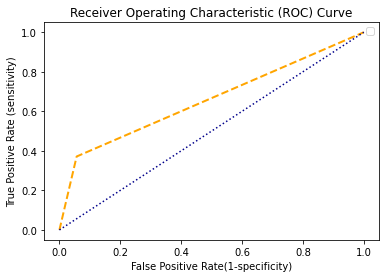

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_logreg = lr.predict(X_test)
get_summary(y_test, y_pred_logreg)

In [54]:
lr.score(X_train, y_train)

0.8872691933916423

In [55]:
accuracy_logreg=accuracy_score(y_test, y_pred_logreg)
accuracy_logreg

0.8526077097505669

# K Neighbors Classifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[364   7]
 [ 60  10]]
Accuracy: [0.84807256]
Sensitivity : [0.85849057]
Specificity : [0.58823529]
Precision: [0.98113208]
Recall: [0.85849057]
F-score: [0.91572327]
AUC: 0.5619946091644205
ROC curve:


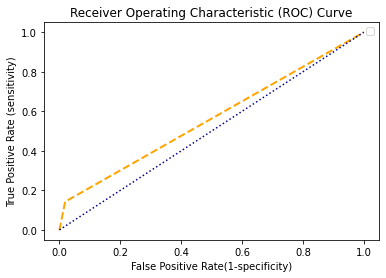

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
get_summary(y_test, y_pred_knn)

In [57]:
knn.score(X_train, y_train)

0.8658892128279884

In [58]:
accuracy_knn=accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.8480725623582767

# Decision Tree Classifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[314  57]
 [ 38  32]]
Accuracy: [0.7845805]
Sensitivity : [0.89204545]
Specificity : [0.35955056]
Precision: [0.84636119]
Recall: [0.89204545]
F-score: [0.86860304]
AUC: 0.6517520215633423
ROC curve:


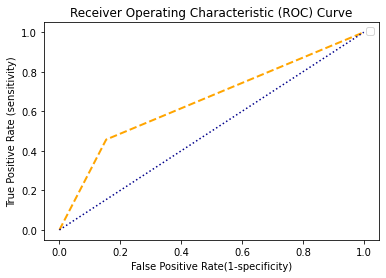

In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
get_summary(y_test, y_pred_dtree)

In [60]:
dtree.score(X_train, y_train)

1.0

In [61]:
accuracy_dtree=accuracy_score(y_test, y_pred_dtree)
accuracy_dtree

0.7845804988662132

# Random Forest Classifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[368   3]
 [ 59  11]]
Accuracy: [0.85941043]
Sensitivity : [0.8618267]
Specificity : [0.78571429]
Precision: [0.99191375]
Recall: [0.8618267]
F-score: [0.92230576]
AUC: 0.5745283018867924
ROC curve:


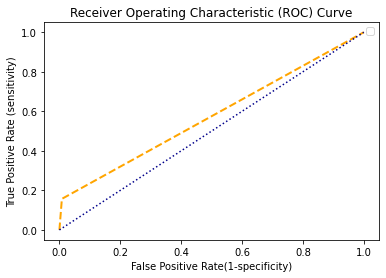

In [62]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
get_summary(y_test, y_pred_rfc)

In [63]:
rfc.score(X_train, y_train)

1.0

In [64]:
accuracy_rfc=accuracy_score(y_test, y_pred_rfc)
accuracy_rfc

0.8594104308390023

# SVC

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[364   7]
 [ 53  17]]
Accuracy: [0.86394558]
Sensitivity : [0.87290168]
Specificity : [0.70833333]
Precision: [0.98113208]
Recall: [0.87290168]
F-score: [0.92385787]
AUC: 0.6119946091644205
ROC curve:


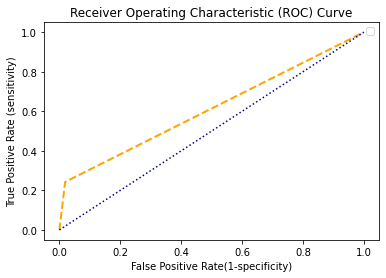

In [65]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
get_summary(y_test, y_pred_svc)

In [66]:
svc.score(X_train, y_train)

0.9310009718172984

In [67]:
accuracy_svc=accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.8639455782312925

# 𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 𝐶𝑜𝑚𝑝𝑎𝑟𝑖𝑠𝑜𝑛

In [68]:
print("*"*10, "Accuracy of train data ", "*"*10)

print("-"*30)
print("LogisticRegression: ", lr.score(X_train, y_train))
print("-"*30)


print("-"*30)
print("KNeighborsClassifier: ", knn.score(X_train, y_train))
print("-"*30)


print("-"*30)
print("DecisionTreeClassifier: ", dtree.score(X_train, y_train))
print("-"*30)


print("-"*30)
print("RandomForestClassifier: ", rfc.score(X_train, y_train))
print("-"*30)


print("-"*30)
print("SVC: ", svc.score(X_train, y_train))
print("-"*30)

********** Accuracy of train data  **********
------------------------------
LogisticRegression:  0.8872691933916423
------------------------------
------------------------------
KNeighborsClassifier:  0.8658892128279884
------------------------------
------------------------------
DecisionTreeClassifier:  1.0
------------------------------
------------------------------
RandomForestClassifier:  1.0
------------------------------
------------------------------
SVC:  0.9310009718172984
------------------------------


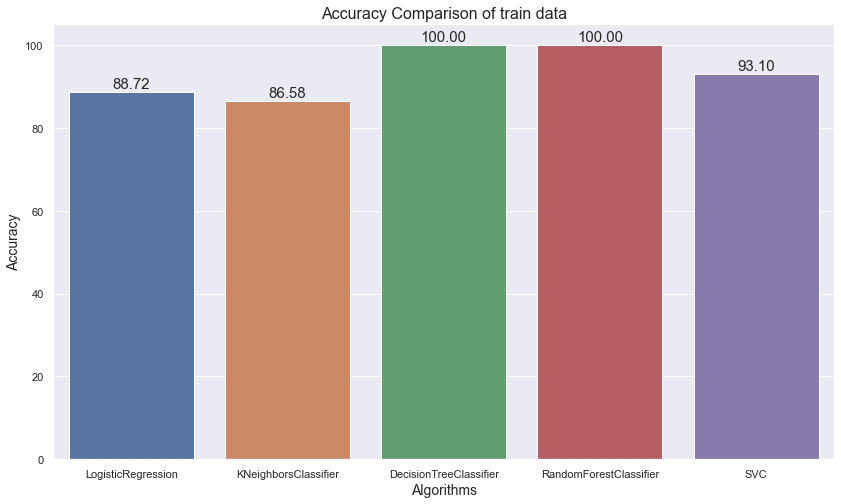

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

lx = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','SVC']
ly = [88.72,86.58,100,100,93.1]

sns.set(rc={'figure.figsize':(14,8)})  # set figure size

plots = sns.barplot(x=lx,y=ly)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Algorithms", size=14)
 
# Setting the label for y-axis
plt.ylabel("Accuracy", size=14)
 
# Setting the title for the graph
plt.title("Accuracy Comparison of train data",size=16)
 
# Finally showing the plot
plt.show()

In [70]:
print("*"*10, "Accuracy of test Data ", "*"*10)

print("-"*30)
print("LogisticRegression: ", accuracy_logreg)
print("-"*30)


print("-"*30)
print("KNeighborsClassifier: ", accuracy_knn)
print("-"*30)


print("-"*30)
print("DecisionTreeClassifier: ", accuracy_dtree)
print("-"*30)


print("-"*30)
print("RandomForestClassifier: ", accuracy_rfc)
print("-"*30)


print("-"*30)
print("SVC: ", accuracy_svc)
print("-"*30)

********** Accuracy of test Data  **********
------------------------------
LogisticRegression:  0.8526077097505669
------------------------------
------------------------------
KNeighborsClassifier:  0.8480725623582767
------------------------------
------------------------------
DecisionTreeClassifier:  0.7845804988662132
------------------------------
------------------------------
RandomForestClassifier:  0.8594104308390023
------------------------------
------------------------------
SVC:  0.8639455782312925
------------------------------


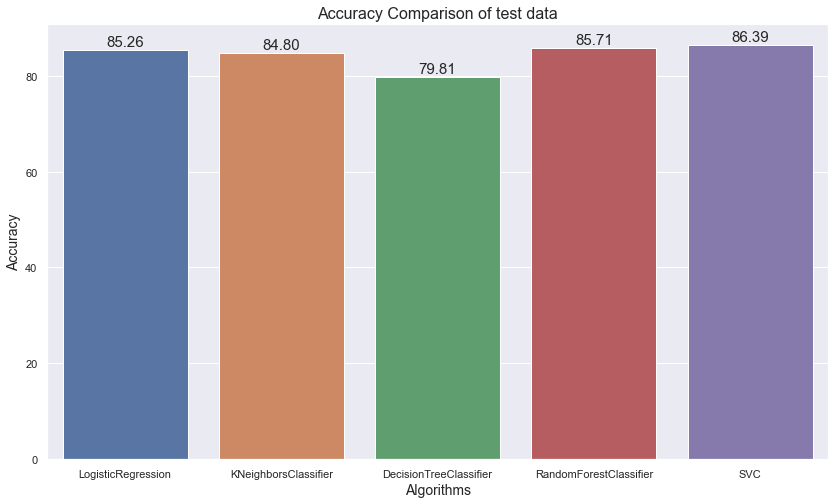

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

lx = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','SVC']
ly = [85.26,84.80,79.81,85.71,86.39]

sns.set(rc={'figure.figsize':(14,8)})  # set figure size

plots = sns.barplot(x=lx,y=ly)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Algorithms", size=14)
 
# Setting the label for y-axis
plt.ylabel("Accuracy", size=14)
 
# Setting the title for the graph
plt.title("Accuracy Comparison of test data",size=16)
 
# Finally showing the plot
plt.show()

# SUMMARY 

### Summary of the performance of  Support Vector Machine (SVM) model on the test data:


* Confusion Matrix: [[364 7]
                  [ 53 17]]
* Accuracy: 0.8639
* Sensitivity: 0.8729
* Specificity: 0.7083
* Precision: 0.9811
* * Recall: 0.8729
* F-score: 0.9239
* AUC: 0.6120

The confusion matrix shows that the model correctly predicted 364 out of 421 observations, with 7 false positives and 53 false negatives. The overall accuracy of the model is 0.8639, meaning that it correctly classified 86.39% of the test data.

The sensitivity of the model is 0.8729, meaning that it correctly identified 87.29% of the positive cases (i.e., those with malignant tumors). The specificity of the model is 0.7083, meaning that it correctly identified 70.83% of the negative cases (i.e., those with benign tumors).

The precision of the model is 0.9811, meaning that of all the cases the model classified as positive, 98.11% were actually positive. The recall (which is the same as sensitivity in this case) is 0.8729, meaning that of all the positive cases in the test set, the model correctly identified 87.29%.

The F-score of the model is 0.9239, which is a weighted average of the precision and recall, and provides a measure of the overall performance of the model.

Finally, the AUC (Area Under the ROC Curve) of the model is 0.6120, which is a measure of the model's ability to distinguish between positive and negative cases. The ROC curve is a graphical representation of the model's performance at different classification thresholds.

### Summary of the performance of  Random Forest model on the test data:



* True Positive (TP): 9
* False Positive (FP): 2
* True Negative (TN): 369
* False Negative (FN): 61

Using these values, the performance metrics for the Random Forest model on the test data are:

* Accuracy: 0.8571 or about 85.7%
* Sensitivity (True Positive Rate): 0.8581 or about 85.8%
* Specificity (True Negative Rate): 0.8182 or about 81.8%
* Precision: 0.9946 or about 99.5%
* Recall: 0.8581 or about 85.8%
* F-score: 0.9213 or about 92.1%
* AUC: 0.5616 or about 56.2%

Note that the AUC is relatively low, which suggests that the Random Forest model may not be a good classifier for this problem. Additionally, the high precision value suggests that when the model predicts a positive result, it is very likely to be correct, but the lower sensitivity value suggests that the model is not as good at identifying true positive cases

## Conclusion

Based on the accuracy and other performance metrics, it appears that the Support Vector Machine (SVM) model may be slightly better than the Random Forest model for this dataset. The SVM model had a higher accuracy and higher AUC, indicating better overall performance.

The SVM model can  used to identify employees who are at high risk of leaving the company, allowing management to take proactive steps to retain these employees. 


# Reference


pavansubhash: IBM HR Analytics Employee Attrition & Performance, Kaggle Datasets

# ******************THANK YOU *****************